In [1]:
import numpy as np
import sklearn as skl
import pandas as pd

from numpy import asarray
from numpy import save

from matplotlib import pyplot


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
StartingData = pd.read_csv('data/train.csv', index_col='id')

In [3]:
dataClean1 = StartingData.dropna()


dataClean2 = dataClean1.drop('user_address', axis=1)

dataClean2['exchange_a_volatility'].value_counts()
exAdict = {
    'very low' : 0,
    'low' : 1,
    'medium' : 2,
    'high' : 3,
    'very high' : 4
}
dataClean2['ex_a_vol_num'] = dataClean2['exchange_a_volatility'].apply(lambda x: exAdict[x])

dataClean3 = dataClean2.drop(['exchange_a_volatility', 'anonymous'], axis=1)
dataClean3.info()

#df_1['isProf'] = df_1[['exchange_a_price', 'exchange_b_price']].apply(lambda x: int(x[0] > x[1]), axis=1)
dataClean3['Profit'] = dataClean3[['exchange_a_price', 'exchange_b_price']].apply(lambda x: x[0] - x[1], axis=1)
dataClean3['Anon'] = dataClean2['anonymous'].apply(lambda x: int(x[1:]))

#dataClean1.info()

for column in dataClean3.columns:
    print(column)
    print(dataClean3[column].corr(dataClean3['result']))

train, test = train_test_split(dataClean3, stratify=dataClean3['result'], test_size=0.2)




<class 'pandas.core.frame.DataFrame'>
Int64Index: 289060 entries, 8 to 3988964
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   user_balance_usd                  289060 non-null  float64
 1   user_balance_coin_a               289060 non-null  float64
 2   user_historical_transactions_10s  289060 non-null  int64  
 3   user_historical_transactions_30s  289060 non-null  int64  
 4   exchange_a_price                  289060 non-null  float64
 5   exchange_b_price                  289060 non-null  float64
 6   exchange_b_volatility             289060 non-null  float64
 7   result                            289060 non-null  int64  
 8   ex_a_vol_num                      289060 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 22.1 MB
user_balance_usd
-0.01819230962493027
user_balance_coin_a
0.016902394001236304
user_historical_transactions_10s
0.35488404968465265
us

In [4]:
ytrain = train['result']
xtrain = train.drop('result', axis=1)

ytest = test['result']
xtest = test.drop('result', axis=1)

Majority class
Precision: 0.95
Rcall: 0.99
F1-Score: 0.97
Minority class
Precision: 0.62
Recall: 0.31
F1-Score: 0.41
[[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.75 0.25]
 [0.98 0.02]
 [0.99 0.01]]
The AUROC of our classifier is = 0.886
The accuracy of our classifier is = 0.939


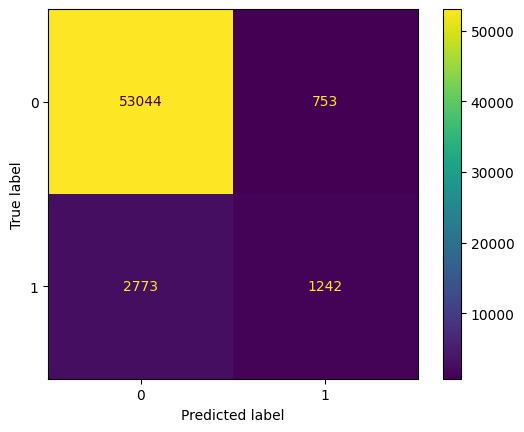

In [5]:
lr_base_clf = RandomForestClassifier()
lr_base_clf.fit(xtrain, ytrain)

y_pred = lr_base_clf.predict(xtest)

print("Majority class")
print("Precision: %.2f" % precision_score(ytest, y_pred, pos_label=0))
print("Rcall: %.2f" % recall_score(ytest, y_pred, pos_label=0))
print("F1-Score: %.2f" % f1_score(ytest, y_pred, pos_label=0))
print("==============")

print("Minority class")
print("Precision: %.2f" % precision_score(ytest, y_pred, pos_label=1))
print("Recall: %.2f" % recall_score(ytest, y_pred, pos_label=1))
print("F1-Score: %.2f" % f1_score(ytest, y_pred, pos_label=1))

cm = confusion_matrix(ytest, y_pred, labels=lr_base_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=lr_base_clf.classes_)
disp.plot();


predicted_proba = lr_base_clf.predict_proba(xtest)
print(predicted_proba)

roc_auc = roc_auc_score(y_score=predicted_proba[:,1], y_true=ytest)
print('The AUROC of our classifier is = %.3f' % roc_auc)

accuracy = accuracy_score(y_pred=y_pred, y_true=ytest)
print('The accuracy of our classifier is = %.3f' % accuracy)

In [6]:
a = StartingData['exchange_a_volatility'].mode()[0]
b = dataClean3['exchange_b_volatility'].median()
c = dataClean3['exchange_a_price'].median()
d = dataClean3['exchange_b_price'].median()
print(a,b,c,d)
dataClean3['ex_a_vol_num'].value_counts()

low 0.00037491496343965 48.620211065283016 49.6776


1    191502
0     42399
2     28270
3     14458
4     12431
Name: ex_a_vol_num, dtype: int64

In [7]:
XTEST = pd.read_csv('data/test.csv', index_col='id')
XTEST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112830 entries, 3988978 to 5307806
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   user_address                      112830 non-null  object 
 1   user_balance_usd                  112830 non-null  float64
 2   user_balance_coin_a               112830 non-null  float64
 3   user_historical_transactions_10s  112830 non-null  int64  
 4   user_historical_transactions_30s  112830 non-null  int64  
 5   exchange_a_price                  103453 non-null  float64
 6   exchange_b_price                  112830 non-null  float64
 7   exchange_a_volatility             107728 non-null  object 
 8   exchange_b_volatility             110036 non-null  float64
 9   anonymous                         112830 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 9.5+ MB


In [8]:
tdataClean1 = XTEST


tdataClean2 = tdataClean1.drop('user_address', axis=1)

tdataClean2['exchange_a_volatility'].value_counts()
exAdict = {
    'very low' : 0,
    'low' : 1,
    'medium' : 2,
    'high' : 3,
    'very high' : 4
}

exAdict2 = {
    0 : 'very low',
    1 : 'low',
    2 : 'medium',
    3 : 'high',
    4 : 'very high'
}

tdataClean2['exchange_a_volatility'] = tdataClean2['exchange_a_volatility'].fillna(a)
tdataClean2['exchange_b_volatility'] = tdataClean2['exchange_b_volatility'].fillna(b)
tdataClean2['exchange_a_price'] = tdataClean2['exchange_a_price'].fillna(c)
tdataClean2['exchange_b_price'] = tdataClean2['exchange_b_price'].fillna(d)

tdataClean2['ex_a_vol_num'] = tdataClean2['exchange_a_volatility'].apply(lambda x:  exAdict[x])

tdataClean3 = tdataClean2.drop(['exchange_a_volatility', 'anonymous'], axis=1)
tdataClean1.info()
#df_1['isProf'] = df_1[['exchange_a_price', 'exchange_b_price']].apply(lambda x: int(x[0] > x[1]), axis=1)
tdataClean3['Profit'] = tdataClean3[['exchange_a_price', 'exchange_b_price']].apply(lambda x: x[0] - x[1], axis=1)
tdataClean3['Anon'] = tdataClean2['anonymous'].apply(lambda x: int(x[1:]))

#dataClean1.info()
tdataClean3.info()


#train, test = train_test_split(tdataClean3, stratify=tdataClean3['result'], test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112830 entries, 3988978 to 5307806
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   user_address                      112830 non-null  object 
 1   user_balance_usd                  112830 non-null  float64
 2   user_balance_coin_a               112830 non-null  float64
 3   user_historical_transactions_10s  112830 non-null  int64  
 4   user_historical_transactions_30s  112830 non-null  int64  
 5   exchange_a_price                  103453 non-null  float64
 6   exchange_b_price                  112830 non-null  float64
 7   exchange_a_volatility             107728 non-null  object 
 8   exchange_b_volatility             110036 non-null  float64
 9   anonymous                         112830 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 9.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11

In [9]:
predicted_proba = lr_base_clf.predict_proba(tdataClean3)
res = pd.DataFrame(index=tdataClean3.index, data=predicted_proba[:,1])
res['result'] = res[0]
res = res.drop(0, axis=1)

res.to_csv(r'PleaseBeGood_new_try.csv', index = True)

In [6]:
exAdict = {
    'A' : 3,
    'F' : 2,
    'M' : 1,
}
dataClean5['Anon'] = dataClean5['Anon'].apply(lambda x: exAdict[x])

NameError: name 'dataClean5' is not defined

In [ ]:
dataClean1 = StartingData.dropna()

dataClean1 = pd.DataFrame(dataClean1)

dataClean1['Anon1'] = dataClean1['anonymous'].apply(lambda x: x[0])

dataClean1['Anon2'] = dataClean1['anonymous'].apply(lambda x: int(x[1:]))

dataClean1.info()

rel = pd.crosstab(index=dataClean1["Anon1"], 
                           columns=dataClean1["result"])
#print(dataClean1[dataClean1['result'] == 1])
print(rel)


rel = pd.crosstab(index=dataClean1["Anon1"], 
                           columns=dataClean1["result"])
#print(dataClean1[dataClean1['result'] == 1])
print(rel)

#for column in dataClean1.columns:
#    print(column)
#    print(dataClean1[column].corr(dataClean1['result']))